<a href="https://colab.research.google.com/github/vivekMishra121/Recipe-Visualization-Application/blob/main/Rapidious_Assignment_Recipe_visualization_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Project Title:  `EpiRecipes Visualization Application`
###Submitted by :- Vivek Mishra
###Email: itsvivek1997.mishra@gmail.com

#Project Objective:

This assignment is designed to evaluate the candidate’s ability to clean, analyze, and
extract insights from data. The focus is on applying creativity to explore the dataset, present
actionable insights, and effectively communicate these through visualizations and a brief video
explanation. The candidate is expected to demonstrate a strong understanding of data analysis
fundamentals and storytelling with data.

#Task 1: Data Cleaning and Preprocessing


###importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

##Loading the Dataset

In [2]:
df=pd.read_json('/content/drive/MyDrive/Rapidious dataset/full_format_recipes.json')


### First View of dataset

In [3]:
df.head()


,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0


In [4]:
df.shape

(20130, 11)

##Dataset Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20130 entries, 0 to 20129
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   directions   20111 non-null  object             
 1   fat          15908 non-null  float64            
 2   date         20111 non-null  datetime64[ns, UTC]
 3   categories   20111 non-null  object             
 4   calories     15976 non-null  float64            
 5   desc         13495 non-null  object             
 6   protein      15929 non-null  float64            
 7   rating       20100 non-null  float64            
 8   title        20111 non-null  object             
 9   ingredients  20111 non-null  object             
 10  sodium       15974 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(5)
memory usage: 1.7+ MB


###Missing / Null Values

In [6]:
df.isnull().sum().sort_values(ascending = False)

,0
desc,6635
fat,4222
protein,4201
sodium,4156
calories,4154
rating,30
directions,19
date,19
categories,19
title,19


Here we can see that `desc`,  `fat`, `protein`, `sodium` and `calories` have the highest null values present (almost 25%).

 ### Checking Null Value by plotting Heatmap

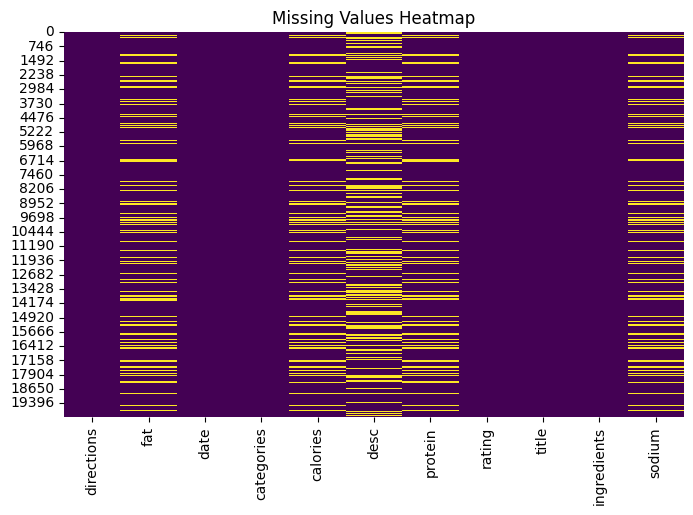

In [7]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

##Understanding your variables

In [8]:
df.columns

Index(['directions', 'fat', 'date', 'categories', 'calories', 'desc',
       'protein', 'rating', 'title', 'ingredients', 'sodium'],
      dtype='object')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fat,15908.0,346.097498,20431.020991,0.0,7.00,17.000,33.000,1722763.0
calories,15976.0,6307.856848,358585.122970,0.0,198.00,331.000,586.000,30111218.0
protein,15929.0,99.946199,3835.616663,0.0,3.00,8.000,27.000,236489.0
rating,20100.0,3.713060,1.343144,0.0,3.75,4.375,4.375,5.0
sodium,15974.0,6211.473832,332890.254083,0.0,80.00,294.000,711.000,27675110.0


### Variable description

`directions` : Step-by-step instructions for preparing the recipe.

`fat` : The amount of fat in the recipe (in grams).


`Date` : The date the recipe was added or published.

`Categories` :  A list of categories or tags associated with the recipe.

`calories` : The total number of calories in the recipe.

`desc` :  A short description or overview of the recipe.

`protein` : The amount of protein in the recipe (in grams).

`rating` : rating or score given to the recipe by users.

`Title` : The name or title of the recipe, providing a quick reference to identify the dish.

`ingredients` : A list of ingredients used in the recipe, with details about quantity, units, and sometimes preparation instructions.

`sodium` : The amount of sodium in the recipe (in miligrams)


##Data Cleaning

In [10]:
df.isna().sum().sort_values(ascending = False)

,0
desc,6635
fat,4222
protein,4201
sodium,4156
calories,4154
rating,30
directions,19
date,19
categories,19
title,19


In our reciepe dataset `desc` is of no use for our analysis so dropping `desc` column and after that dropped null values corresponding to `Title` column.

In [11]:
df.drop(columns='desc',axis  = 1,inplace = True)

In [12]:
df.dropna(subset=['title'],axis = 0,inplace = True)

In [13]:
df.isna().sum().sort_values(ascending = False)

,0
fat,4203
protein,4182
sodium,4137
calories,4135
rating,11
directions,0
date,0
categories,0
title,0
ingredients,0


After that imputed the null values of `Fat`, `protein`, `sodium` and `calories` column by its categories mean values.

In [14]:
df_exploded = df.explode('categories')

numeric_columns = ['fat', 'protein', 'sodium', 'calories']


# Calculate the mean for each category (only for the numeric columns)
category_means = df_exploded.groupby('categories')[numeric_columns].mean()

# Define a function to impute missing values based on category means
def impute_with_category_means(row, column):
    categories = row['categories']  # list of categories for the recipe

    # Get the mean for the column across all categories for the recipe
    category_means_for_recipe = category_means.loc[categories, column].mean()

    return category_means_for_recipe if pd.isnull(row[column]) else row[column]

# Impute missing values using the mean of the categories for each recipe
for column in numeric_columns:
    df[column] = df.apply(lambda row: impute_with_category_means(row, column), axis=1)


In [15]:
df.isna().sum()

,0
directions,0
fat,20
date,0
categories,0
calories,18
protein,20
rating,11
title,0
ingredients,0
sodium,18


In [16]:
#now dropping the remaining null values from dataset
df.dropna(inplace=True)

In [17]:
df.isna().sum()

,0
directions,0
fat,0
date,0
categories,0
calories,0
protein,0
rating,0
title,0
ingredients,0
sodium,0


* now we can see there is no null values present.

##Data Tranformation

1. Transforming `direction` column to extract total cooking time using `extract_time` function.

In [18]:
import re

def extract_time(directions):
    # Compile the regex pattern to match time (minutes or hours)
    time_pattern = re.compile(r'(\d+)\s*(minutes|minute|hours|hour)', re.IGNORECASE)
    total_time = 0

    # Split directions by period, comma, or newlines to identify steps (adjust if your data uses different separators)
    steps = re.split(r'[.,\n]', directions)

    for step in steps:
        matches = time_pattern.findall(step.lower())
        for match in matches:
            time_value = int(match[0])  # Extract the numeric part of the time
            unit = match[1]  # Extract the unit (minutes or hours)

            # Convert hours to minutes
            if 'hour' in unit:
                time_value *= 60  # Convert hours to minutes

            total_time += time_value  # Add time to the total
    return total_time

# Assuming 'df2' has a column 'directions' which contains the steps of cooking instructions as strings
df['cooking_time_minutes'] = df['directions'].astype(str).apply(extract_time)




2. Droping the direction column beacause it is no use of our data analysis.

In [19]:
df.drop(columns='directions',axis  = 1,inplace = True)

3. Transforming `Ingredients` columns to extract the name of ingredients and ommiting the unnecessary words from ingredients column to make a new column named `cleaned_ingredients_list`.

In [20]:
import re

# List of unwanted words/descriptors
unwanted_words = ['chopped', 'peeled', 'divided', 'optional', 'fresh', 'diced', 'large',
                  'small', 'medium', 'ground', 'sliced', 'cut', 'into', 'and', 'for',
                  'garnish', 'grated', 'coarsely', 'halved', 'trimmed', 'minced','packed', 'unsweetened']

def clean_ingredient(ingredient):
    # Regular expression to remove quantities, units, and descriptors.
    clean_text = re.sub(r'(\d+[\s/]?\d*\s*(teaspoon[s]?|tablespoon[s]?|cup[s]?|ounce[s]?|pound[s]?|g|lb|qt|generous|ounce|from|into|cut|pound|pieces|piece|gram[s]?|ml|clove[s]?|pinch|dash|small|finely|grated|fresh|peeled|pound|medium|large|extra-large|extra|fresh|diced|chopped|peeled|optional|coarsely|packed|toasted|unsweetened|ground|sliced|cut|into|and|for|garnish|or|plus)\s*)', '', ingredient, flags=re.IGNORECASE)

    # Remove leading/trailing spaces
    clean_text = clean_text.strip()

    # Remove any leading non-alphabetic characters (except commas)
    clean_text = re.sub(r'^[^a-zA-Z,]*', '', clean_text)

    # Remove any non-alphabetic characters, except commas and spaces
    clean_text = re.sub(r'[^a-zA-Z,\s]', '', clean_text)

    # Convert the cleaned string into a list by splitting on commas
    ingredient_list = [item.strip() for item in clean_text.split(',')]

    # Remove ingredients that contain unwanted words
    cleaned_list = [item for item in ingredient_list if not any(unwanted in item.lower() for unwanted in unwanted_words)]

    return cleaned_list

# Apply the function to the dataframe
df['cleaned_ingredients_list'] = df['ingredients'].astype(str).apply(clean_ingredient)



4. Now dropping existing `ingredients` column.

In [21]:
df.drop(columns='ingredients',axis  = 1,inplace = True)

5. After that removed time stamp from `date` column and transformed date into standard date format.

In [22]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.date

##Outliars Detection and removal

1. Plotting Box-Plot to check outliars in our dataset.

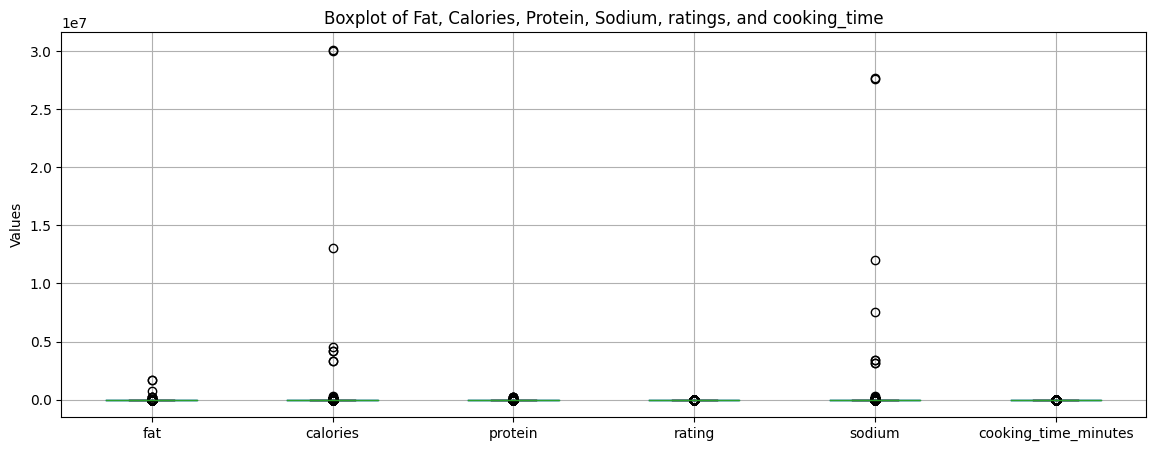

In [23]:

# Create a boxplot for all numerical columns
plt.figure(figsize=(14, 5))  # Set figure size
df.boxplot()

# Add title and labels
plt.title('Boxplot of Fat, Calories, Protein, Sodium, ratings, and cooking_time')
plt.ylabel('Values')

# Show the plot
plt.show()


* Here we can see there are some potential outliars present in `fat`, `calories` and in `sodium` columns.

2. Removing Outliars by Inter Quartile range (IQR) Capping method.

In [24]:
#Handling Outliars by IQR Method

column = ['fat','calories','protein','sodium','cooking_time_minutes']

# Function to apply IQR capping
def cap_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Compute the IQR
    IQR = Q3 - Q1

    # Define the lower and upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the values outside the bounds
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

# Apply the function to each column in the dataset
for col in column:
    cap_outliers(df, col)


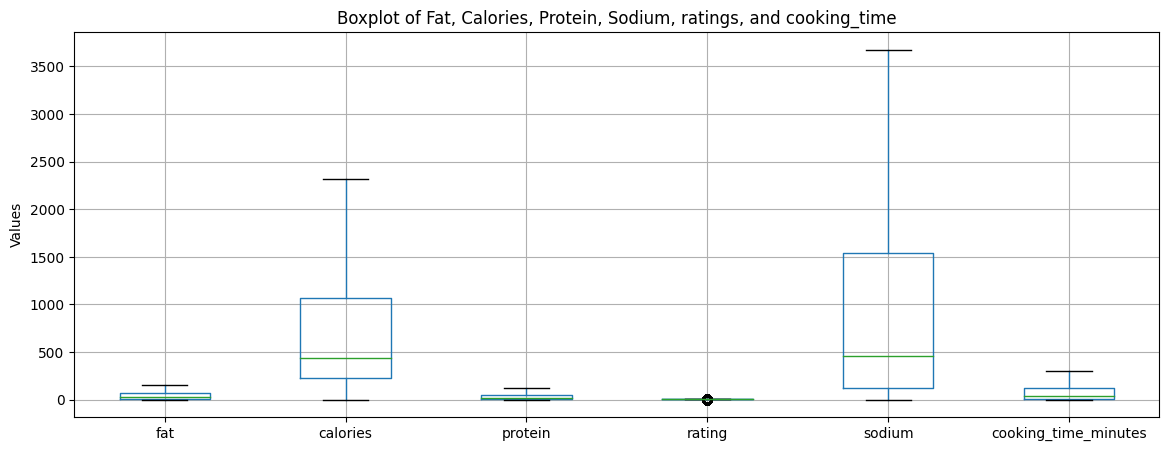

In [25]:
# Create a boxplot for all numerical columns
plt.figure(figsize=(14, 5))  # Set figure size
df.boxplot()

# Add title and labels
plt.title('Boxplot of Fat, Calories, Protein, Sodium, ratings, and cooking_time')
plt.ylabel('Values')

# Show the plot
plt.show()


* Now we can see there is no outliars left in our dataset.

### Checking for the distribution of our numerical columns for further analysis.

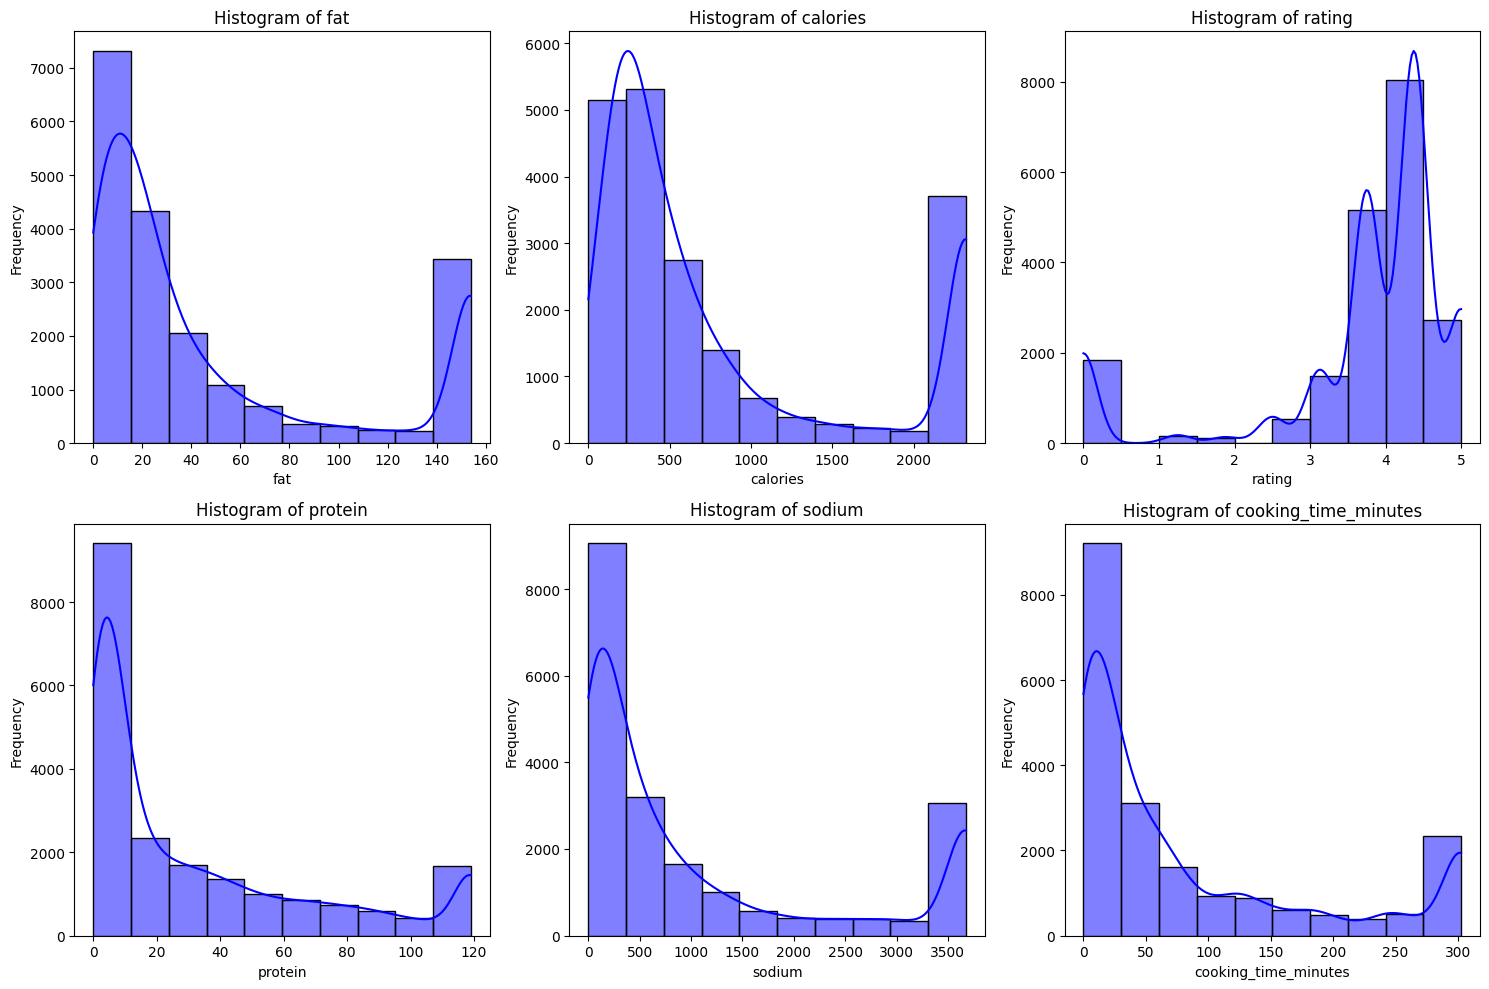

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2x3 grid of subplots

# Flatten axes to easily iterate over them
axes = axes.flatten()

# List of column names
columns = ['fat','calories','rating','protein','sodium','cooking_time_minutes']

# Loop through each column and create a histogram
for i, col in enumerate(columns):
    sns.histplot(df[col], bins=10, kde=True, ax=axes[i], color='blue', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

We can observe that most of the columns are Right Skewed or Positive Skewed except `rating` which is negative skewed.

# Documentation of Data Preprocessing


##Data Cleaning and transformation Process for Recipe Dataset
###Challenges Faced


1. **Multiple Ingredients per Recipe**:

The dataset contained ingredients as a single string per recipe, making it difficult to analyze individual ingredients. The challenge was to split these ingredient lists accurately without losing relevant information.


2. **Presence of Unwanted Descriptors**:

Ingredients came with descriptors like "chopped," "peeled," "divided," and quantities (e.g., "2 cups"). These descriptors were unnecessary for analysis, and cleaning them was challenging due to their diverse usage patterns.


3. **Handling Missing Data:**

Columns like fat, protein, sodium, and calories had missing values. The challenge was to find a logical way to impute these missing values that retained the integrity of the data.


4. **Inconsistent Categories:**

The categories column sometimes contained multiple categories for a single recipe, making analysis and grouping difficult. Exploding these categories to multiple rows led to duplicated data for other columns.

5. **Outliers in Numerical Columns:**

Outliers in columns such as calories, cooking_time_minutes, and rating skewed the analysis and visualizations. Outlier handling was necessary to improve model accuracy and insights.


##Decisions Made During Preprocessing
1. **Ingredient Cleaning:**

A regular expression (regex) function named `cleaned_ingredients` was used to clean the ingredients column by removing quantities (e.g., "2 cups"), units (e.g., "teaspoons"), and descriptors (e.g., "chopped", "peeled"). This cleaned the data for a more uniform analysis of ingredients.

2. **Assumptions for Missing Values:**

Missing values in columns like `fat`, `protein`, `sodium`, and `calories` were filled using the mean values calculated per recipe category. The assumption here was that recipes within the same category (e.g., "desserts" or "main course") would have similar nutritional profiles.


3. **Outlier Handling Using IQR Capping:**

Outliers in numerical columns (e.g., calories, cooking time,fat,sodium) were addressed using the Interquartile Range (IQR) capping method. This decision helped limit the impact of extreme values without removing data points altogether.


3. **Exploding Categories:**

The `categories` column, which sometimes contained multiple categories for a single recipe, was exploded into separate rows to allow better aggregation and grouping. However, this led to data duplication for other columns, which was handled by resetting the index after exploding.

#Task 2 :  Exploratory Data Analysis (EDA)

##1. What are the most common ingredients in highly rated recipes?

In [27]:
# Function to extract common ingredients from highly rated recipes
def common_ingredients(dataframe, rating_threshold=4):
    high_rated = dataframe[dataframe['rating'] >= rating_threshold]
    ingredients_series = high_rated['cleaned_ingredients_list'].explode()
    return ingredients_series.value_counts().head(10)

In [28]:
# Analyze common ingredients in highly rated recipes
top_ingredients = common_ingredients(df)
print("Top Common Ingredients in Highly Rated Recipes:")
print(top_ingredients)

Top Common Ingredients in Highly Rated Recipes:
cleaned_ingredients_list
sugar                    2976
salt                     2811
olive oil                2335
water                    1462
arlic cloves             1380
eggs                     1200
extravirgin olive oil    1028
unsalted butter           983
vegetable oil             875
onion                     851
Name: count, dtype: int64


* Plot a Bar chart to visualize the common ingredients in highly rated reciepe.

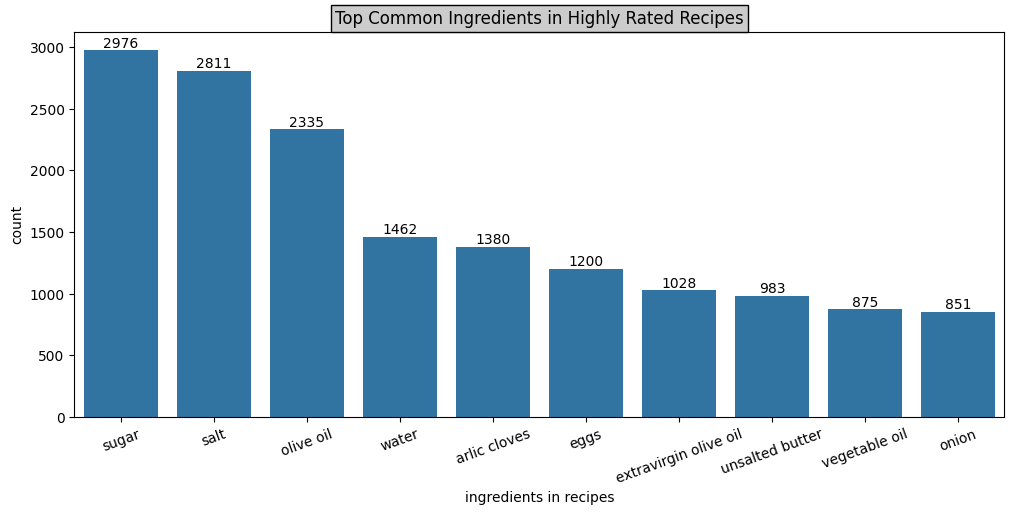

In [52]:
plt.figure(figsize =(12,5))
plt.xticks(rotation=20)
ax = sns.barplot(top_ingredients)
plt.title("Top Common Ingredients in Highly Rated Recipes",bbox={'facecolor':'0.8', 'pad':3})
plt.xlabel('ingredients in recipes')
for bar in ax.containers:
  ax.bar_label(bar)
plt.show()


**Insights:** Here we can see `sugar`, `salt`, `olive oil` and `water` are the most common ingredients that are found in highly rated recepies.

##2. Are there correlations between preparation time and recipe ratings?

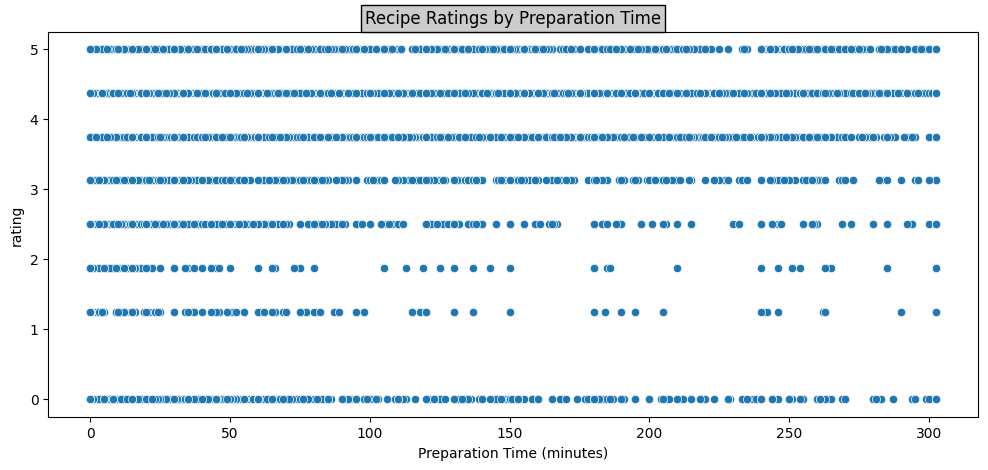

In [55]:
plt.figure(figsize =(12,5))
sns.scatterplot(x = df['cooking_time_minutes'],y =df['rating'])

plt.title('Recipe Ratings by Preparation Time',bbox={'facecolor':'0.8', 'pad':3})
plt.xlabel('Preparation Time (minutes)')
plt.show()

**Insights:** There is NO as such correlation between preperation time and rating of a perticular reciepe.

##3. What is the Percetage distribution of Top-5 Categories in recipes?

In [53]:
top_categories = df['categories'].explode().value_counts().sort_values(ascending=False).head().reset_index()
top_categories

,categories,count
0,Bon Appétit,9355
1,Peanut Free,8390
2,Soy Free,8088
3,Tree Nut Free,7044
4,Vegetarian,6846


* Plotted Pie chart to visulaize distribution of categories.

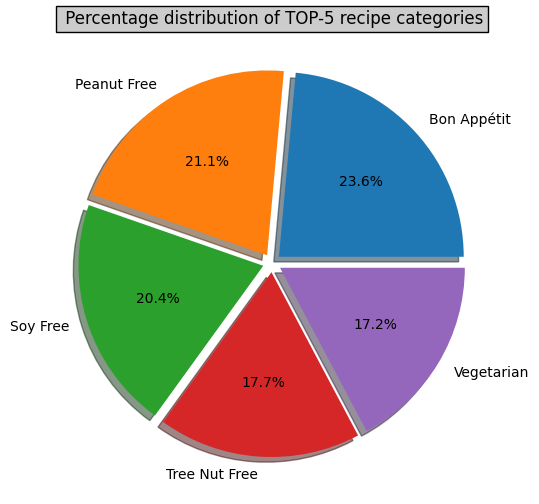

In [51]:
plt.figure(figsize =(8,6))
plt.pie(x= top_categories['count'],labels=top_categories['categories'],shadow=True,explode=(0.05,0.05,0.05,0.05,0.05), autopct='%1.1f%%')
plt.title(' Percentage distribution of TOP-5 recipe categories',bbox={'facecolor':'0.8', 'pad':3})
plt.show()

**Insights:** Here we can observe that `Bon Appetit` has highest distribution % in categories of 23.6% and followed by `Peanut Free` which is contributing 21.1% of total categories present .

##4. Word Cloud of Most Common Recipe Categories

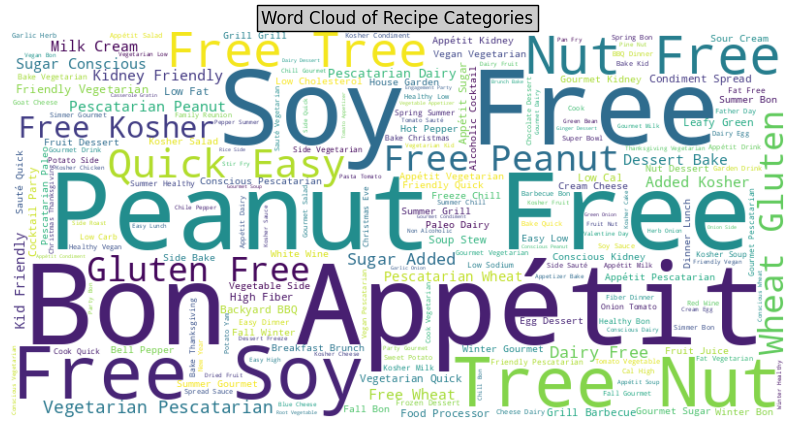

In [50]:
from wordcloud import WordCloud
df_exploded = df.explode('categories')
text = ' '.join(df_exploded['categories'].astype(str).values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Recipe Categories',bbox={'facecolor':'0.8', 'pad':3})
plt.show()


**Insights :** From the Word Cloud it is clear that Peanut Free, Bon Appetit, Free Soy, Gluten Free, Tree nut are the most common categories in the recipe.

##5. Radar Plot for Nutritional Content Across Categories

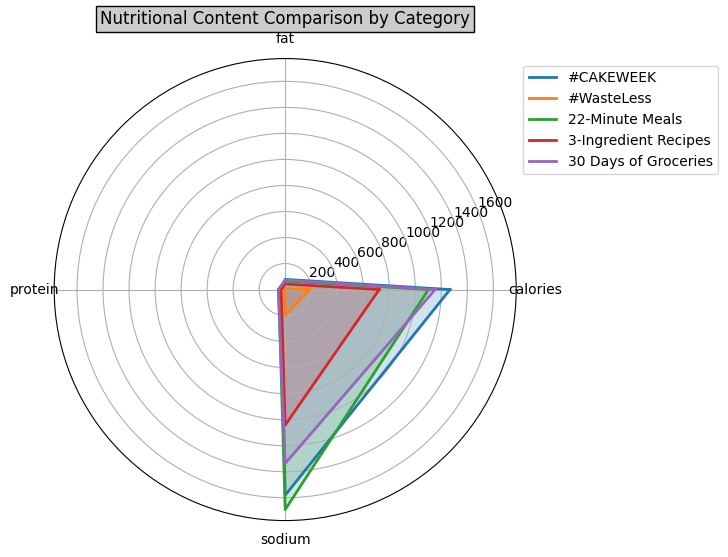

In [69]:
from math import pi

# Average nutritional values by category
avg_nutrition = df_exploded.groupby('categories')[['calories', 'fat', 'protein', 'sodium']].mean()

# Choose categories and metrics to compare
categories = avg_nutrition.index[:5]  # top 5 categories
metrics = avg_nutrition.columns

# Initialize radar plot
num_vars = len(metrics)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

fig, ax = plt.subplots(figsize=(8,6), subplot_kw=dict(polar=True))

# Plot each category
for i, category in enumerate(categories):
    values = avg_nutrition.loc[category].values.flatten().tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=category)
    ax.fill(angles, values, alpha=0.2)

# Add labels
plt.xticks(angles[:-1], metrics)
plt.title('Nutritional Content Comparison by Category',bbox={'facecolor':'0.8', 'pad':3})
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1))
plt.show()


**Insights:** By Radar Chart it is evident that our top 5 categories of recipe contains mainly `sodium` and `calories` and neutrients like `Protein` and Fat are `very low` in our recipes.

##6. Scatter plot for correlation between Sodium content and Calories content in a recepie

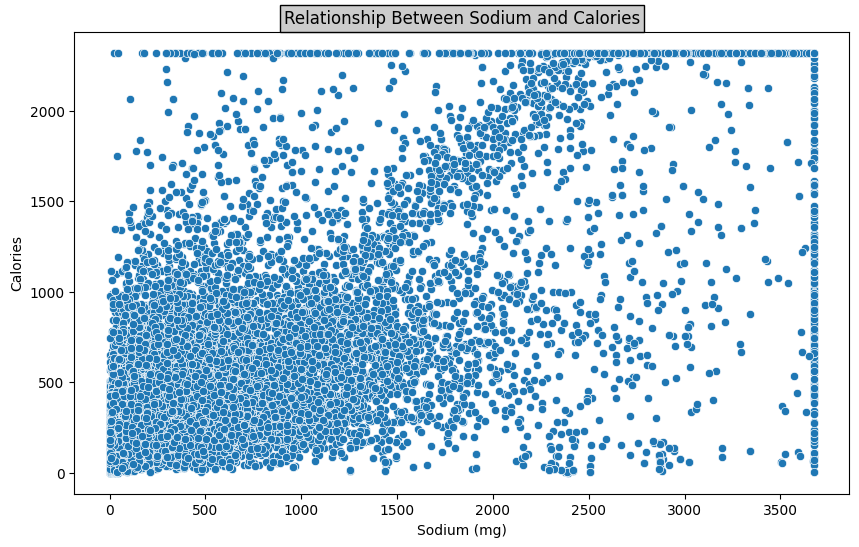

In [79]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sodium', y='calories', data=df)

plt.title('Relationship Between Sodium and Calories',bbox={'facecolor':'0.8', 'pad':3})
plt.xlabel('Sodium (mg)')
plt.ylabel('Calories')
plt.show()


**Insights:** From the above scatter plot it is almost `positive correlation `between quantity of `Sodium` and amount of `calories` in our recipe.

##7. Correlation Heatmap

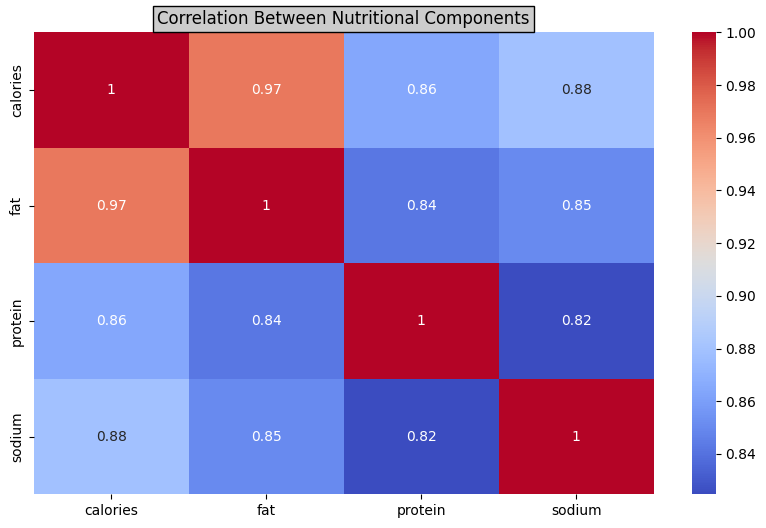

In [80]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['calories', 'fat', 'protein', 'sodium']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Nutritional Components',bbox={'facecolor':'0.8', 'pad':3})
plt.show()


**Insights:** from the correlation matrix it is evident that `Fat` and `calories` are highly correlated and also `sodium` and `calories` are correlated .
It means in our food recipe these elements are found togather.

#Solution to Business Objective

##What do you suggest the client to achieve Business Objective ?

###1. Promote Popular Ingredients

**Suggestion:** Highlight recipes with top ingredients like sugar, salt, olive oil, and water.

**Impact:** Increases engagement by showcasing highly rated recipes, boosting user satisfaction.
###2. Capitalize on Top Recipe Categories

**Suggestion:** Feature categories like Bon Appetit and Peanut Free prominently.


**Impact:** Drives traffic to the most popular recipe types, improving user retention and experience.
###3. Offer Healthier Recipe Options

**Suggestion:** Create and tag low-sodium, low-calorie, and balanced-nutrient recipes.


**Impact:** Attracts health-conscious users and enhances the platform's appeal for wellness enthusiasts.
###4. Introduce Ingredient Substitution Tool

**Suggestion:** Allow users to swap high-calorie/sodium ingredients with healthier alternatives.


**Impact:** Improves recipe customization, encouraging users to experiment and create healthier meals.
###5. Focus on Nutritional Optimization

**Suggestion:** Optimize existing recipes by balancing sodium, calories, and protein content.

**Impact:** Promotes healthier eating habits and positions the platform as a go-to for balanced recipes.

#Conclusion:

##By implementing these solutions based on the analysis, the platform can:

* Improve user satisfaction with personalized and health-conscious recipe suggestions.
* Increase user engagement through category-based promotions and content structuring.
* Attract a broader audience, particularly health-conscious users, with balanced recipes and ingredient recommendations.